In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ndi
import imageio
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/My Drive/slike_abs/slike_mr_roi')

In [ ]:
# Load the NIfTI file
nii_file1 = r'slike_mr_roi\topcow_ct_whole_001_0000.nii.gz'
nii_file2 = r'C:\Users\marij\ABS-PROJEKAT\TopCoW_Data_MICCAI2023\TopCoW_Data_MICCAI2023\topcow_batch-1_40pairMRCT_30062023\imagesTr\topcow_ct_roi_001_0000.nii.gz'
nii_file3 = r'C:\Users\marij\ABS-PROJEKAT\TopCoW_Data_MICCAI2023\TopCoW_Data_MICCAI2023\topcow_batch-1_40pairMRCT_30062023\imagesTr\topcow_mr_whole_001_0000.nii.gz'
nii_file4 = r'C:\Users\marij\ABS-PROJEKAT\TopCoW_Data_MICCAI2023\TopCoW_Data_MICCAI2023\topcow_batch-1_40pairMRCT_30062023\imagesTr\topcow_mr_roi_001_0000.nii.gz'


img1 = nib.load(nii_file1)
img2 = nib.load(nii_file2)
img3 = nib.load(nii_file3)
img4 = nib.load(nii_file4)


data1 = img1.get_fdata()
data2 = img2.get_fdata()
data3 = img3.get_fdata()
data4 = img4.get_fdata()


print(data1.shape)
print(data2.shape)
print(data3.shape)
print(data4.shape)


In [ ]:
slika1 = data1[:, :, 150]
slika2 = data2[:, :, 10]
slika3 = data3[:, :, 90]
slika4 = data4[:, :, 15]


fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(10,8), dpi = 120)
im1 = axes[0,0].imshow(slika1, cmap='gray');axes[0,0].axis('off');axes[0,0].set_title('CT-cela slika');
im2 = axes[0,1].imshow(slika2, cmap='gray');axes[0,1].axis('off');axes[0,1].set_title('CT-region of interest');
im3 = axes[1,0].imshow(slika3, cmap='gray');axes[1,0].axis('off');axes[1,0].set_title('MR-cela slika');
im4 = axes[1,1].imshow(slika4, cmap='gray');axes[1,1].axis('off');axes[1,1].set_title('MR-region of interest');
fig.colorbar(im1, ax=axes[0,0], fraction = 0.03, pad = 0.04)
fig.colorbar(im2, ax=axes[0,1], fraction = 0.03, pad = 0.04)
fig.colorbar(im3, ax=axes[1,0], fraction = 0.03, pad = 0.04)
fig.colorbar(im4, ax=axes[1,1], fraction = 0.03, pad = 0.04)


min = slika1.min()
max = slika1.max()
slika1 = (slika1-min)/(max-min)*255
slika1 = np.uint8(slika1)

min = slika2.min()
max = slika2.max()
slika2 = (slika2-min)/(max-min)*255
slika2 = np.uint8(slika2)

min = slika3.min()
max = slika3.max()
slika3 = (slika3-min)/(max-min)*255
slika3 = np.uint8(slika3)

min = slika4.min()
max = slika4.max()
slika4 = (slika4-min)/(max-min)*255
slika4 = np.uint8(slika4)

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(10,8), dpi = 120)
im1 = axes[0,0].imshow(slika1, cmap='gray');axes[0,0].axis('off');axes[0,0].set_title('CT-cela slika');
im2 = axes[0,1].imshow(slika2, cmap='gray');axes[0,1].axis('off');axes[0,1].set_title('CT-region of interest');
im3 = axes[1,0].imshow(slika3, cmap='gray');axes[1,0].axis('off');axes[1,0].set_title('MR-cela slika');
im4 = axes[1,1].imshow(slika4, cmap='gray');axes[1,1].axis('off');axes[1,1].set_title('MR-region of interest');
fig.colorbar(im1, ax=axes[0,0], fraction = 0.03, pad = 0.04)
fig.colorbar(im2, ax=axes[0,1], fraction = 0.03, pad = 0.04)
fig.colorbar(im3, ax=axes[1,0], fraction = 0.03, pad = 0.04)
fig.colorbar(im4, ax=axes[1,1], fraction = 0.03, pad = 0.04)


plt.figure()
hist = ndi.histogram(slika1, 0, 255, 256)
plt.plot(hist)
plt.title('Histogram-CT-cela slika');
plt.figure()
hist = ndi.histogram(slika2, 0, 255, 256)
plt.plot(hist)
plt.title('Histogram-CT-region of interest');
plt.figure()
hist = ndi.histogram(slika3, 0, 255, 256)
plt.plot(hist)
plt.title('Histogram-MR-cela slika');
plt.figure()
hist = ndi.histogram(slika4, 0, 255, 256)
plt.plot(hist)
plt.title('Histogram-MR-region of interest');

In [ ]:
from skimage import exposure
slika_out1 = exposure.rescale_intensity(slika1, in_range = (150, 180), out_range = (0, 255))

slika_out2 = exposure.rescale_intensity(slika2, in_range = (0, 150), out_range = (0, 255))

slika_out3 = exposure.rescale_intensity(slika3, in_range = (0, 80), out_range = (0, 255))

slika_out4 = exposure.rescale_intensity(slika4, in_range = (0, 80), out_range = (0, 255))


fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(10,8), dpi = 120)
im1 = axes[0,0].imshow(slika_out1, cmap='gray');axes[0,0].axis('off');axes[0,0].set_title('CT-cela slika-nakon popravke kontrasta');
im2 = axes[0,1].imshow(slika_out2, cmap='gray');axes[0,1].axis('off');axes[0,1].set_title('CT-region of interest-nakon popravke kontrasta');
im3 = axes[1,0].imshow(slika_out3, cmap='gray');axes[1,0].axis('off');axes[1,0].set_title('MR-cela slika-nakon popravke kontrasta');
im4 = axes[1,1].imshow(slika_out4, cmap='gray');axes[1,1].axis('off');axes[1,1].set_title('MR-region of interest-nakon popravke kontrasta');
fig.colorbar(im1, ax=axes[0,0], fraction = 0.03, pad = 0.04)
fig.colorbar(im2, ax=axes[0,1], fraction = 0.03, pad = 0.04)
fig.colorbar(im3, ax=axes[1,0], fraction = 0.03, pad = 0.04)
fig.colorbar(im4, ax=axes[1,1], fraction = 0.03, pad = 0.04)


In [ ]:
H = 128
W = 128
images = [];
labels = [];

for i in range(40):
    nii_file = 'topcow_mr_roi_0' + str(i+1).zfill(2) + '_0000.nii.gz'
    data = nib.load(nii_file);
    img = data.get_fdata()
    mins = np.min(img, axis=(0,1));
    maxs = np.max(img, axis=(0,1));
    mins = mins.reshape((1, 1, -1))
    maxs = maxs.reshape((1, 1, -1))
    maxs = np.where(maxs == mins, maxs + 1, maxs)
    img = (img-mins)/(maxs-mins);
    dim = np.shape(img)[2];
    for j in range(dim):
        img1 = cv2.resize(img[:,:,j], (W, H))
        img1 = img1.astype(np.float32);
        img1 = np.expand_dims(img1, axis=-1)
        if(i==0):
            images = img1;
        else:
            images = np.concatenate((images, img1), axis = 2);


In [ ]:
print(np.shape(images));

(128, 128, 1389)


In [ ]:
os.chdir('/content/drive/My Drive/slike_abs/slike_mr_roi_labels')

In [ ]:
for i in range(40):
    nii_file = 'topcow_mr_roi_0' + str(i+1).zfill(2) + '.nii.gz'
    data = nib.load(nii_file);
    img = data.get_fdata()
    mins = np.min(img, axis=(0,1));
    maxs = np.max(img, axis=(0,1));
    mins = mins.reshape((1, 1, -1))
    maxs = maxs.reshape((1, 1, -1))
    maxs = np.where(maxs == mins, maxs + 1, maxs)
    img = (img-mins)/(maxs-mins);
    dim = np.shape(img)[2];
    for j in range(dim):
        img1 = cv2.resize(img[:,:,j], (W, H))
        img1 = img1.astype(np.float32);
        img1 = np.expand_dims(img1, axis=-1)
        if(i==0):
            labels = img1;
        else:
            labels = np.concatenate((labels, img1), axis = 2);

In [ ]:
print(np.shape(labels));

(128, 128, 1389)


In [ ]:
for i in range(30):
    nii_file = 'topcow_mr_roi_0' + str(i+41).zfill(2) + '_0000.nii.gz'
    data = nib.load(nii_file);
    img = data.get_fdata()
    mins = np.min(img, axis=(0,1));
    maxs = np.max(img, axis=(0,1));
    mins = mins.reshape((1, 1, -1))
    maxs = maxs.reshape((1, 1, -1))
    maxs = np.where(maxs == mins, maxs + 1, maxs)
    img = (img-mins)/(maxs-mins);
    dim = np.shape(img)[2];
    for j in range(dim):
        img1 = cv2.resize(img[:,:,j], (W, H))
        img1 = img1.astype(np.float32);
        img1 = np.expand_dims(img1, axis=-1)
        images = np.concatenate((images, img1), axis = 2);

In [ ]:
print(np.shape(images));

(128, 128, 2497)


In [ ]:
for i in range(30):
    nii_file = 'topcow_mr_roi_0' + str(i+41).zfill(2) + '.nii.gz'
    data = nib.load(nii_file);
    img = data.get_fdata()
    mins = np.min(img, axis=(0,1));
    maxs = np.max(img, axis=(0,1));
    mins = mins.reshape((1, 1, -1))
    maxs = maxs.reshape((1, 1, -1))
    maxs = np.where(maxs == mins, maxs + 1, maxs)
    img = (img-mins)/(maxs-mins);
    dim = np.shape(img)[2];
    for j in range(dim):
        img1 = cv2.resize(img[:,:,j], (W, H))
        img1 = img1.astype(np.float32);
        img1 = np.expand_dims(img1, axis=-1)
        labels = np.concatenate((labels, img1), axis = 2);

In [ ]:
print(np.shape(labels));

(128, 128, 2497)


In [ ]:
images_transposed = np.transpose(images, (2, 0, 1))
images = images_transposed.reshape(2497, 128, 128, 1)
labels_transposed = np.transpose(labels, (2, 0, 1))
labels = labels_transposed.reshape(2497, 128, 128, 1)

print(np.shape(images));
print(np.shape(labels))

(2497, 128, 128, 1)
(2497, 128, 128, 1)


In [ ]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input
from tensorflow.keras.models import Model


def conv_block(inputs, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(inputs)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    return x

def encoder_block(inputs, num_filters):
    x = conv_block(inputs, num_filters)
    p = MaxPool2D((2, 2))(x)
    return x, p

def decoder_block(inputs, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, 2, strides=2, padding="same")(inputs)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

def build_unet(input_shape):
    inputs = Input(input_shape)

    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)
    s4, p4 = encoder_block(p3, 512)

    # print(s1.shape, s2.shape, s3.shape, s4.shape)
    # print(p1.shape, p2.shape, p3.shape, p4.shape)

    b1 = conv_block(p4, 1024)

    d1 = decoder_block(b1, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    outputs = Conv2D(1, 1, padding="same", activation="sigmoid")(d4)

    model = Model(inputs, outputs, name="UNET")
    return model

input_shape = (128, 128, 1);
model = build_unet(input_shape)
model.summary()
model.save('unet_marije_gas.h5')


Model: "UNET"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 64)         640       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 128, 128, 64)         256       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 128, 128, 64)         0         ['batch_normalization[0][0]

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from google.colab import files
files.download('unet_marije_gas.h5');

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K

smooth = 1e-15
def dice_coef(y_true, y_pred):
    #y_true = tf.cast(y_true, tf.float32)/255.0
    #y_pred = tf.cast(y_pred, tf.float32)/255.0
    y_true = tf.keras.layers.Flatten()(y_true)
    y_pred = tf.keras.layers.Flatten()(y_pred)
    intersection = tf.reduce_sum(y_true * y_pred)
    return (2. * intersection + smooth) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) + smooth)

def dice_loss(y_true, y_pred):
    return 1.0 - dice_coef(y_true, y_pred)

In [ ]:
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, ReduceLROnPlateau, EarlyStopping, TensorBoard
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('unet_marije_gas.h5')

np.random.seed(42)
tf.random.set_seed(42)
images_tr, images_val, labels_tr, labels_val = train_test_split(images, labels, test_size=0.2, random_state=42)
batch_size1 = 16
lr = 1e-4
num_epochs = 5
model.compile(loss=dice_loss, optimizer=Adam(lr), metrics=[dice_coef])
callbacks1 = [
        ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-7, verbose=1),
        EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ]

In [ ]:
model.summary()

Model: "UNET"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 64)         640       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 128, 128, 64)         256       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 128, 128, 64)         0         ['batch_normalization[0][0]

In [ ]:
'''history = model.fit(images_tr,
                    labels_tr,
                    epochs=num_epochs,
                    batch_size=batch_size1,
                    validation_data=(images_val, labels_val),
                    callbacks=callbacks1,
                    verbose=1)
'''
model.save('unet_marije_gas.h5')
from google.colab import files
files.download('unet_marije_gas.h5');

Epoch 1/5
125/125 [==============================] - 3549s 28s/step - loss: 0.4613 - dice_coef: 0.5390 - val_loss: 0.9240 - val_dice_coef: 0.0753 - lr: 1.0000e-04
Epoch 2/5
125/125 [==============================] - 3575s 29s/step - loss: 0.2984 - dice_coef: 0.7016 - val_loss: 0.9442 - val_dice_coef: 0.0553 - lr: 1.0000e-04
Epoch 3/5
125/125 [==============================] - 3554s 28s/step - loss: 0.2448 - dice_coef: 0.7552 - val_loss: 0.7548 - val_dice_coef: 0.2424 - lr: 1.0000e-04
Epoch 4/5
125/125 [==============================] - 3549s 28s/step - loss: 0.2065 - dice_coef: 0.7936 - val_loss: 0.3114 - val_dice_coef: 0.6864 - lr: 1.0000e-04
Epoch 5/5
125/125 [==============================] - 3512s 28s/step - loss: 0.1756 - dice_coef: 0.8245 - val_loss: 0.2073 - val_dice_coef: 0.7912 - lr: 1.0000e-04


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
os.chdir('/content/drive/My Drive/slike_abs/slike_mr_roi')
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
for i in range(20):
    images1 = []
    nii_file = 'topcow_mr_roi_0' + str(i+71).zfill(2) + '_0000.nii.gz'
    data = nib.load(nii_file);
    img = data.get_fdata()
    mins = np.min(img, axis=(0,1));
    maxs = np.max(img, axis=(0,1));
    mins = mins.reshape((1, 1, -1))
    maxs = maxs.reshape((1, 1, -1))
    maxs = np.where(maxs == mins, maxs + 1, maxs)
    img = (img-mins)/(maxs-mins);
    dim = np.shape(img)[2];
    for j in range(dim):
        img1 = cv2.resize(img[:,:,j], (W, H))
        img1 = img1.astype(np.float32);
        img1 = np.expand_dims(img1, axis=-1);
        if(j==0):
            images1 = img1;
        else:
            images1 = np.concatenate((images1, img1), axis = 2);
    images_transposed = np.transpose(images1, (2, 0, 1))
    d1 = np.shape(images_transposed)[0];
    images1 = images_transposed.reshape(d1, 128, 128, 1)
    print(np.shape(images1));


    y_pred = model.predict(images1, verbose = 0);
    y_pred = np.squeeze(y_pred, axis=-1);
    y_pred = y_pred >= 0.5;
    y_pred = y_pred.astype(np.uint8);
    for j in range(d1):
      img_path = 'izlaz' + str(j) + '.png';
      save_dir = '/content/drive/My Drive/izlazi_abs' + str(i+1);
      image_path = os.path.join(save_dir, img_path);
      plt.imsave(image_path, y_pred[j])

In [ ]:
import os
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ndi
import imageio
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import cv2
W = 128;
H = 128;

In [ ]:
dice_arr = np.zeros(12)

In [ ]:
os.chdir('/content/drive/My Drive/slike_abs/slike_mr_roi_labels')

labels1 = [];
nii_file = 'topcow_mr_roi_0' + str(71).zfill(2) + '.nii.gz'
data = nib.load(nii_file);
img = data.get_fdata()
mins = np.min(img, axis=(0,1));
maxs = np.max(img, axis=(0,1));
mins = mins.reshape((1, 1, -1))
maxs = maxs.reshape((1, 1, -1))
maxs = np.where(maxs == mins, maxs + 1, maxs)
img = (img-mins)/(maxs-mins);
dim = np.shape(img)[2];
for j in range(dim):
    img1 = cv2.resize(img[:,:,j], (W, H))
    img1 = img1.astype(np.float32);
    img1 = np.expand_dims(img1, axis=-1)
    if(j==0):
        labels1 = img1;
    else:
        labels1 = np.concatenate((labels1, img1), axis = 2);


In [ ]:
os.chdir('/content/drive/My Drive/izlazi_abs1')
from PIL import Image


izlazi = []
for i in range(45):
  image_path = 'izlaz' + str(i) + '.png'
  izlaz = Image.open(image_path)
  izlaz = izlaz.convert('L');
  #izlaz = izlaz.astype(np.float32);
  izlaz = np.expand_dims(izlaz, axis=-1)
  izlaz = izlaz/255;
  if(i==0):
    izlazi = izlaz;
  else:
    izlazi = np.concatenate((izlazi, izlaz), axis = 2);
print(np.shape(izlazi));

(128, 128, 45)


In [ ]:
labels1 =  labels1 >= 0.5;
izlazi =  izlazi >= 0.5;
labels1=tf.cast(labels1, tf.float32)
izlazi=tf.cast(izlazi,tf.float32)

In [ ]:
dice=0.0;
for i in range(45):
  dice=dice+dice_coef(labels1[:,:,i], izlazi[:,:,i])
dice=dice/45
print(dice)
dice_arr[11]=dice

tf.Tensor(0.89398474, shape=(), dtype=float32)


In [ ]:
print(dice_arr)

[0.90938705 0.66829145 0.81367207 0.77749932 0.73401642 0.97041988
 0.88582993 1.00009608 0.79655737 0.6578474  0.88171661 0.89398474]


In [ ]:
dice_mean=np.mean(dice_arr)
print(dice_mean)

0.8324431926012039


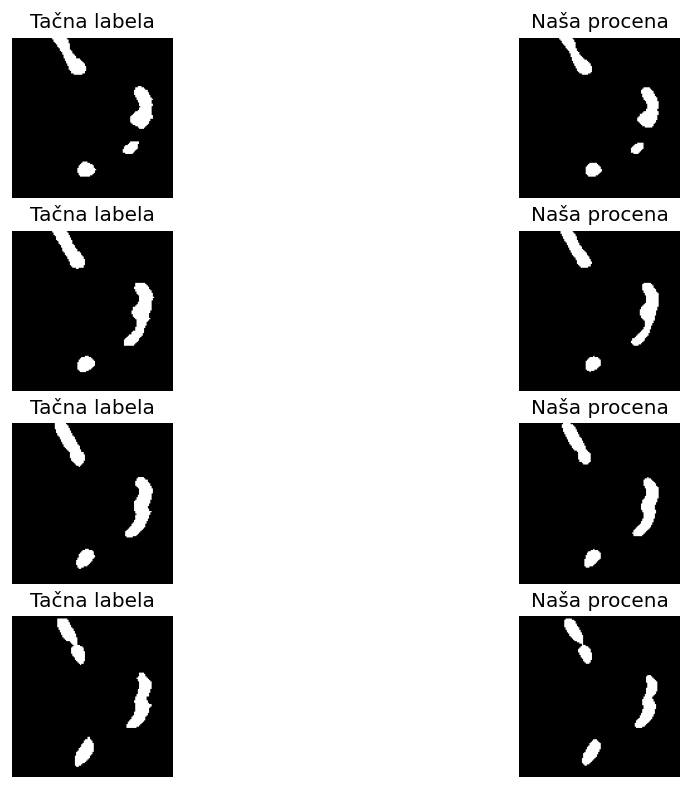

In [ ]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize=(10,8), dpi = 120);

for i in range(20,24):
  y_true = labels1[:,:,i];
  y_pred = izlazi[:,:,i];
  axes[i-20,0].imshow(y_true, cmap='gray');axes[i-20,0].axis('off');axes[i-20,0].set_title('Tačna labela');
  axes[i-20,1].imshow(y_pred, cmap='gray');axes[i-20,1].axis('off');axes[i-20,1].set_title('Naša procena');
